# Samuels Viewer

Interface to functionality for viewing and comparing corpora processed with the Samuels Processor

In [1]:
import SamuelsCorpus as Sam
%matplotlib inline

Set up some filenames - these should be the base names (Samuels Viewer will add the _combined.csv and _cooccurrence.json endings for the individual files.  Only set the parentdir if these files are not stored in the current directory.)

In [2]:
#parentdir="/Users/juliewe/Dropbox/oldbailey/speech_corpora/theft/all/samuels_tagged"
filenames={'fnonl':'f_nonl','mnonl':'m_nonl','mleg':'m_leg'}
           

Load up files into a Samuels Viewer

In [3]:
mleg=Sam.Viewer(filenames['mleg'],colors=['g'])

Now we can play with the bag-of-words functionality in the SamuelsViewer

Size of corpus is 165824
(ZC [Grammatical Item],44079) : [('the', 10535), ('of', 3925), ('to', 3543), ('did', 3091), ('in', 2442), ('a', 1893), ('that', 1757), ('and', 1528), ('do', 1467), ('at', 1189)]
(ZF [Pronoun],24808) : [('you', 11066), ('it', 2140), ('your', 2067), ('he', 1882), ('what', 1748), ('that', 1596), ('him', 1174), ('them', 528), ('they', 503), ('she', 465)]
(NULL,14837) : [('?', 6548), (',', 4713), ('.', 2614), (';', 329), (')', 209), ('(', 209), ('-', 167), ('"', 30), (':', 12), ('!', 3)]
(AK.01.g [State/condition],6741) : [('was', 2500), ('is', 1166), ('were', 927), ('are', 751), ('been', 545), ('be', 499), ('being', 157), ('way', 75), ("'s", 62), ('am', 28)]
(ZA01 [Personal Name],2712) : [('mr.', 810), ('mrs.', 186), ('walsh', 46), ('aslett', 41), ('thomas', 40), ('swinton', 33), ('march', 30), ('kelly', 30), ('jones', 28), ('john', 27)]
(AP.04 [Number],2231) : [('last', 247), ('one', 226), ('two', 201), ('first', 136), ('three', 109), ('next', 60), ('five', 59), (

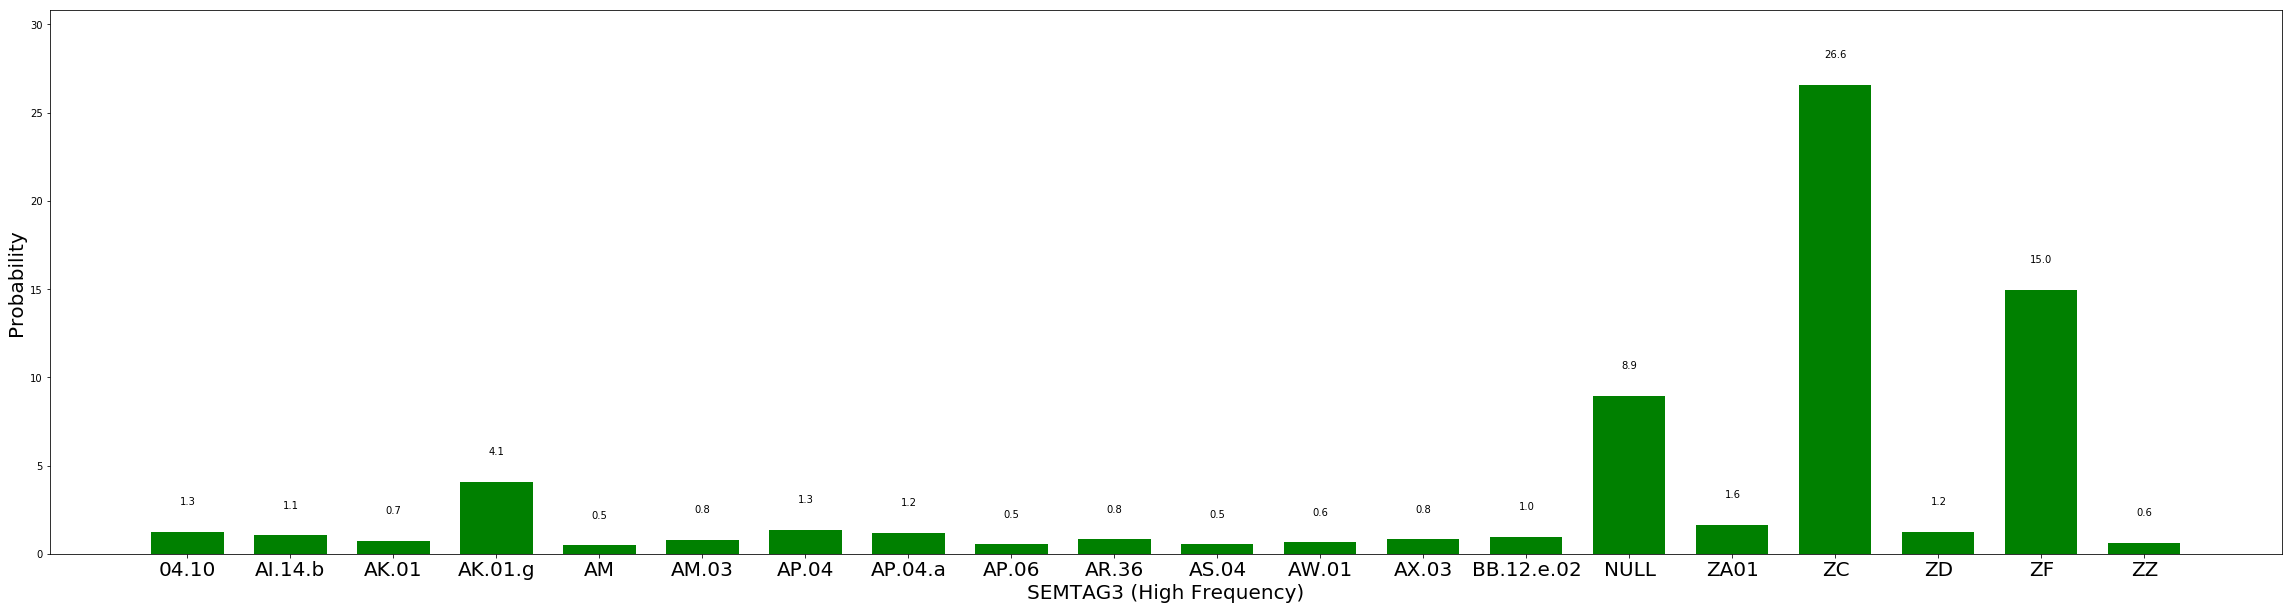

In [4]:
mleg_tagbag=mleg.make_bow(field='SEMTAG3',cutoff=20,displaygraph=True)

There are functions to find tags for words and words for tags e.g.,

In [5]:
print(mleg.find_tags('woman',field='SEMTAG3'))
print(mleg.find_tags('women',field='SEMTAG3'))

[('AD.03.b [Woman]', 173), ('AY.06.b [The common people]', 4), ('AY.01.g.01 [Married woman]', 3), ('BB.09.b.01 [Servant]', 1)]
[('AD.03.b [Woman]', 12)]


In [6]:
print(mleg.find_tags('man',field='SEMTAG3'))
print(mleg.find_tags('men',field='SEMTAG3'))

[('AD.03.a [Man]', 583), ('AD.03.h.01 [Old man]', 1)]
[('AD.03.a [Man]', 74)]


In [7]:
print(mleg.find_tags('child',field='SEMTAG3'))
print(mleg.find_tags('children',field='SEMTAG3'))

[('AD.03.d [Child]', 20), ('AY.01.e.02 [Child]', 2), ('ZA01 [Personal Name]', 1)]
[('AD.03.d [Child]', 6)]


In [8]:
print(mleg.find_text('AD.03.b'))

[('woman', 173), ('women', 12), ('wife', 5), ('piece', 1), ('mare', 1)]


In [9]:
print(mleg.find_text('AD.03.a'))

[('man', 583), ('men', 74), ('horse', 3), ('horses', 2), ('gentleman', 2), ('boy', 2), ('pieces', 1), ('piece', 1), ('birds', 1)]


In [10]:
print(mleg.find_text('AD.03.d'))

[('child', 20), ('children', 6)]


We can also view the co-occurrence distributions for tags.  

* Note that the number associated with the tag is a weight.  Currently it is set to be normalised localised PPMI.  Localised PPMI multiplies PPMI by probability.  Normalisation means that the vector is a unit vector (this won't change the order of saliency but typically makes all of the numbers smaller since the unit vector has length 1 ... the reason for doing this is that it is then more efficient to compute similarities between vectors).

* The list of words (and associated words) for the conceptual features ARE NOW context-specific i.e., words used to express this conceptual feature in the specific context of the given tag.

<8075>: up stairs , was it a man 's footstep or a woman 's ? How old are you ? Do 
<16126>: passed away some of those notes ; do you know a woman of the name of Bridget Sturgess or Bridget 
<24444>: this manner ? According to your account , she was a very bad woman ? Upon your oath , did 
(_det:ZC [Grammatical Item],0.8652375771084915) : [('the', 88), ('this', 43), ('a', 20), ('these', 1)]
<29987>: when you received it ? Did you know where this young woman lived ? Did you ask her any questions 
<44694>: oath did you not apply to the mother of this young woman , and tell her , if she would 
<65589>: key ? Were there any notes in it ? This young woman lived in the house with you ? You 
(_amod:AF.05 [Plants defined by age/cycles],0.41137177570358824) : [('young', 26)]
<87915>: of that the woman had in her apron . You are a married woman . Had you observed any body 
<141284>: what she said Are you sure of his person You are the wife of the constable . Did you occasionally 
<142729>: you gi

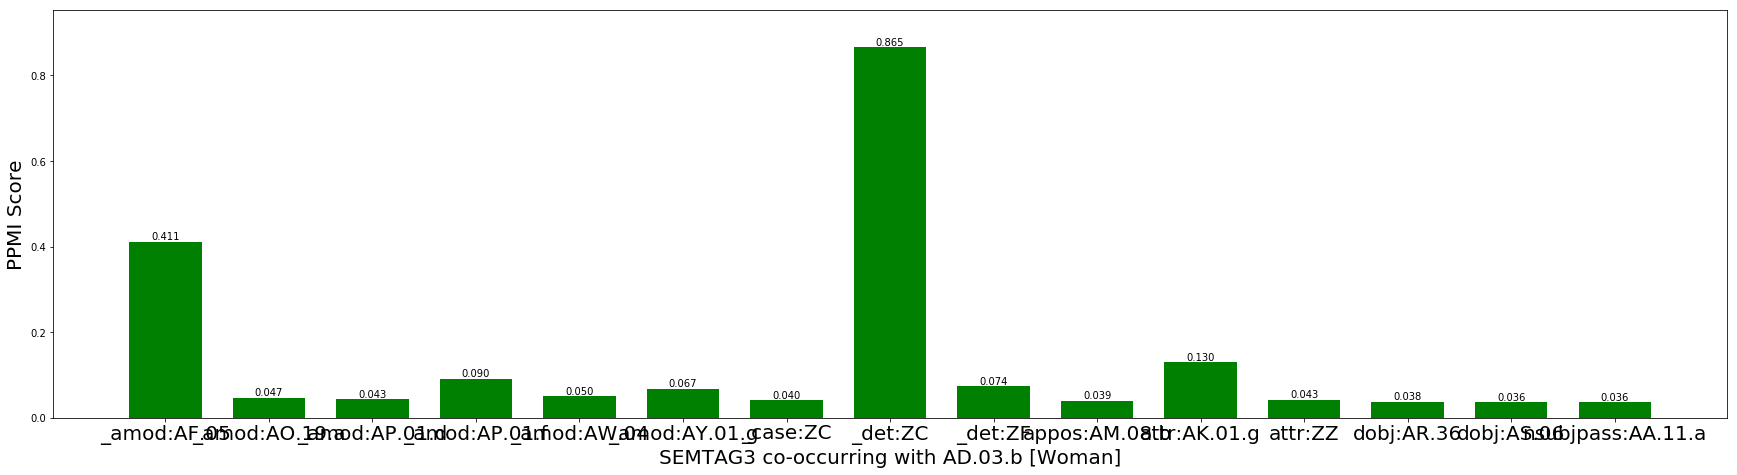

In [11]:
woman=mleg.get_top_features('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.8365017841994749)
(_amod, 0.4862699046894988)
(attr, 0.15349810790255566)
(_relcl, 0.14650943809815098)
(nsubj, 0.07918152963183712)
(dobj, 0.06844931769820553)
(_appos, 0.05091964157182276)
(pobj, 0.04651114025413175)
(_case, 0.03341802238871892)
(nsubjpass, 0.028253541342879072)


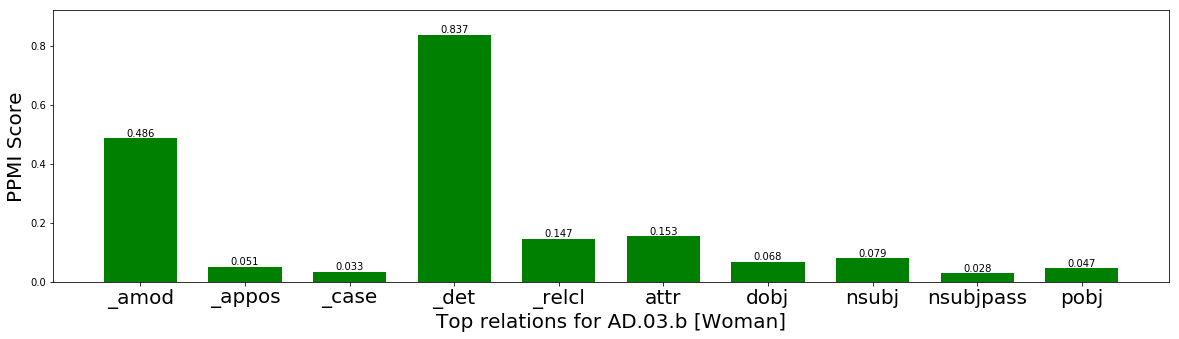

In [12]:
r=mleg.get_top_relations('AD.03.b',displaygraph=True,cutoff=10)

(_det, 0.8701749279767876)
(_amod, 0.3253232386807805)
(_relcl, 0.24065804452113365)
(attr, 0.23961782119402358)
(nsubj, 0.11673062650900645)
(dobj, 0.06955076677115313)
(_case, 0.031977319316120564)
(_acl, 0.02719852463422484)
(_nummod, 0.024591432434779667)
(pobj, 0.022776962932837017)


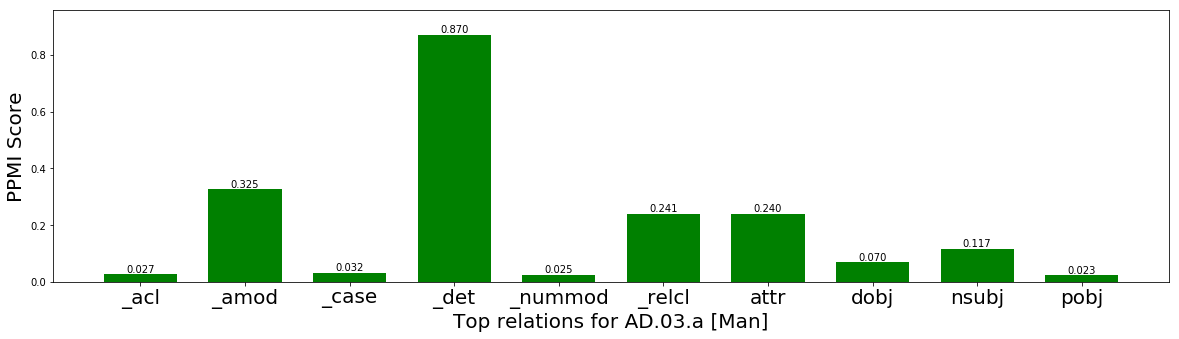

In [13]:
mr=mleg.get_top_relations('AD.03.a',displaygraph=True,cutoff=10)

(_det, 0.8862383169663842)
(_case, 0.3233304951994236)
(attr, 0.1956415867771171)
(poss, 0.16587162506834763)
(dobj, 0.15157853300611482)
(_amod, 0.06715715266147702)
(_relcl, 0.06493289441665695)
(appos, 0.04940726771131967)
(_appos, 0.04940726771131967)
(conj, 0.047541709797999564)


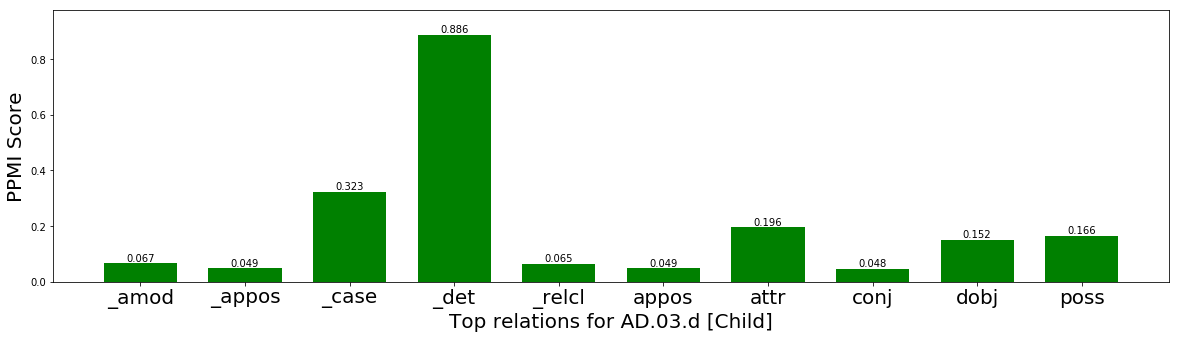

In [14]:
mr=mleg.get_top_relations('AD.03.d',displaygraph=True,cutoff=10)

<29987>: when you received it ? Did you know where this young woman lived ? Did you ask her any questions 
<44694>: oath did you not apply to the mother of this young woman , and tell her , if she would 
<65589>: key ? Were there any notes in it ? This young woman lived in the house with you ? You 
(AF.05 [Plants defined by age/cycles],0.961691046419818) : [('young', 26)]
<40292>: had sworn ? What are you ? Are you a married woman ? You are the prisoner 's sister ? 
<79121>: you any information of the robbery ? Are you a married woman ? Was she paid any thing ? Did 
<85950>: Wood , seventeen pounds eight shillings . Are you a married woman . That was three . Did you ever 
(AY.01.g [Marriage/wedlock],0.16745115517618195) : [('married', 4)]
<25527>: private trade of pepper on board that ship ? This poor woman , I believe , up to this time 
<61174>: your charging the constable with her ? I believe this poor woman has a husband who is a maniac ? 
<86105>: with the prisoner . That is your c

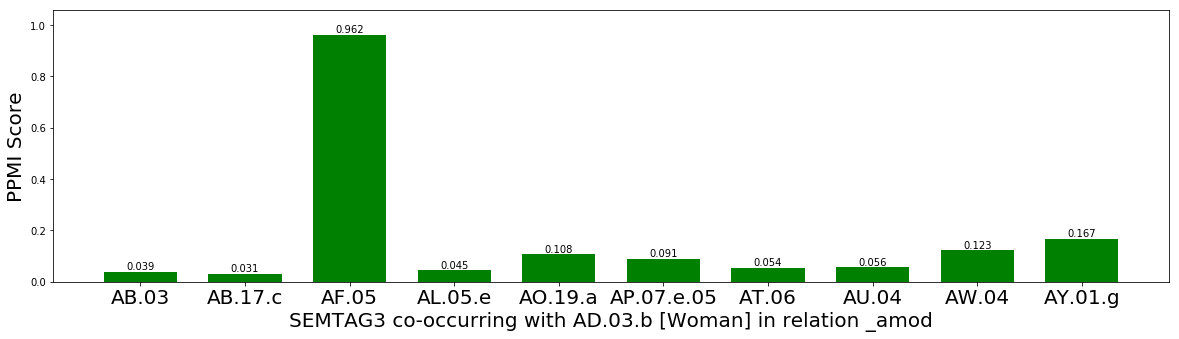

In [15]:
w=mleg.get_top_features('AD.03.b',rel='_amod',displaygraph=True)

<10423>: ? Did you ever pay for the sheep ? This young man at the bar drove for his father ? 
<15080>: And before they came into the office in which this young man was ? Therefore it might be in the 
<20204>: is visible in that post-mark ? You have known this young man , I believe , ever since he was 
(AF.05 [Plants defined by age/cycles],0.8910282407459208) : [('young', 40)]
<145231>: you think if the room had been a resort of different men , you must have known it The woman 
(AP.01.f [Difference],0.2450494877662125) : [('other', 36), ('different', 1)]
<1672>: to him before he was here ? Is he the same man who was convicted here of coining ? I 
<8990>: when you came back with your father , was the same man that you had seen with the truss ? 
<9008>: truss ? Look at the prisoner , is that the same man ? How do you know the contents of 
(AP.01.d [Identity],0.23591811714261993) : [('same', 26)]
<28803>: upon that ? Did you ever take up a more drunken man since you have been in the office

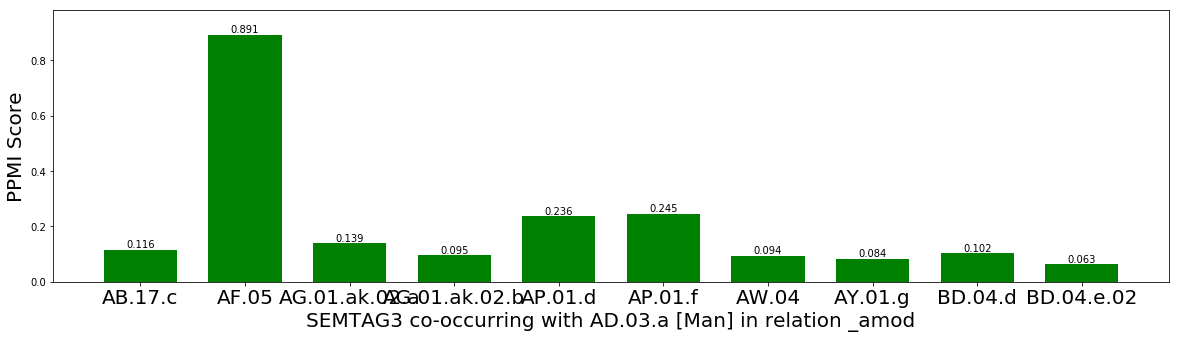

In [16]:
m=mleg.get_top_features('AD.03.a',rel='_amod',displaygraph=True)

<142894>: About what time of day was it you saw that little child How far is Stepney church-yard from your house 
(AS.11.a [Unimportance, triviality],0.819034112904566) : [('little', 1)]
<142908>: is Stepney church-yard from your house What became of the young child Did any body else lodge in that room 
(AF.05 [Plants defined by age/cycles],0.5737448229819861) : [('young', 1)]


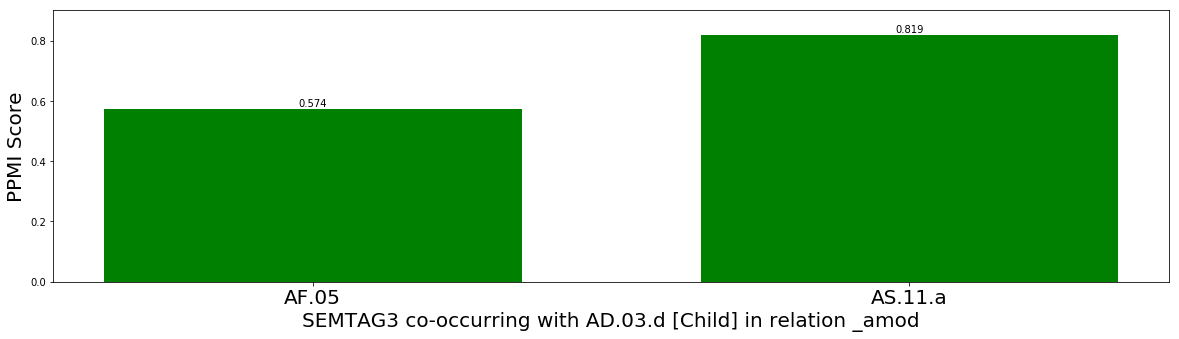

In [17]:
c=mleg.get_top_features('AD.03.d',rel='_amod',cutoff=10,displaygraph=True)

<95193>: you . Are you no profession . What do you accuse this young woman of . How long had you 
<108417>: thing else Is it not to save yourself that you accuse this woman When did you first tell of this 
<143127>: Can you swear to the silk How came you to accuse this woman of taking the notes , when there 
(AS.06 [Accusation, charge],0.5661835900050896) : [('accuse', 3)]
<16125>: had passed away some of those notes ; do you know a woman of the name of Bridget Sturgess or 
<41495>: you not think it right you should ? Do you know that woman ? When was this ? He was 
<109685>: key and seal on the 10th of May Do you know this woman Have you ever seen the watch again 
(AR.36 [Knowledge],0.4283637324772247) : [('know', 6), ('known', 1)]
<135637>: was in the shop at the time that you was serving this woman with the calico Had you any of 
(AO.15.d [Expediency],0.33323004947573326) : [('serving', 1)]
<24187>: property was to go after his death ? Did you recommend this woman , and give her a c

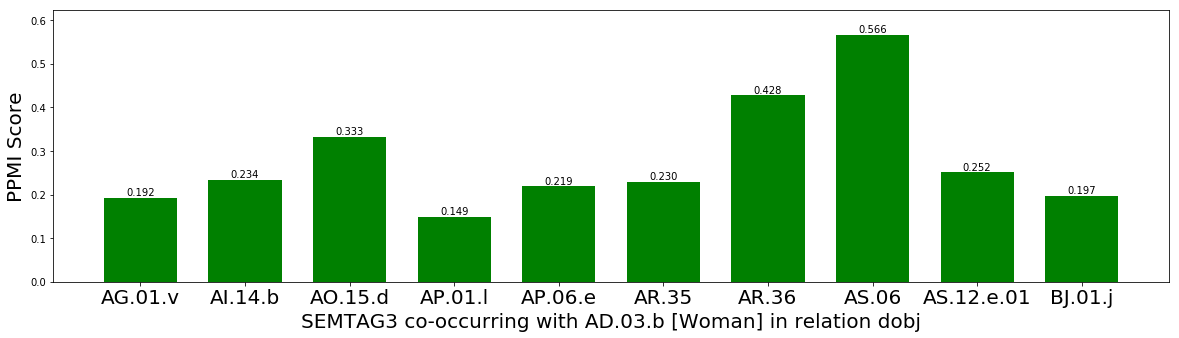

In [18]:
w=mleg.get_top_features('AD.03.b',rel='dobj',displaygraph=True)

<80000>: prisoner at the bar ? What sort of a face had the other man ? Did either of them speak 
<114236>: able to attend here My question is , whether you had any medical man to ascertain the fact , that 
(AR.36 [Knowledge],0.7253765241181376) : [('know', 20), ('known', 6), ('had', 2), ('knowing', 1)]
<38794>: not be sure that the sash was down ? You saw this man , when you looked over the paling 
<69983>: burglary ? When were you told so - before you saw this man or since ? Who told you since 
<127710>: you remember Postan coming down and telling you that he saw a stout man , a suspicious character Had you 
(AI.14.b [Seeing/looking],0.43842277683083347) : [('see', 13), ('saw', 7), ('seen', 4), ('sees', 1)]
<75719>: could get your bread any where . What do you accuse this man of ? Did you know him before 
<76510>: ? Of your own knowledge you have no reason to accuse this man ? What did you lose ? You 
<94546>: had it been forced or how . Why do you accuse this man of taking it . How l

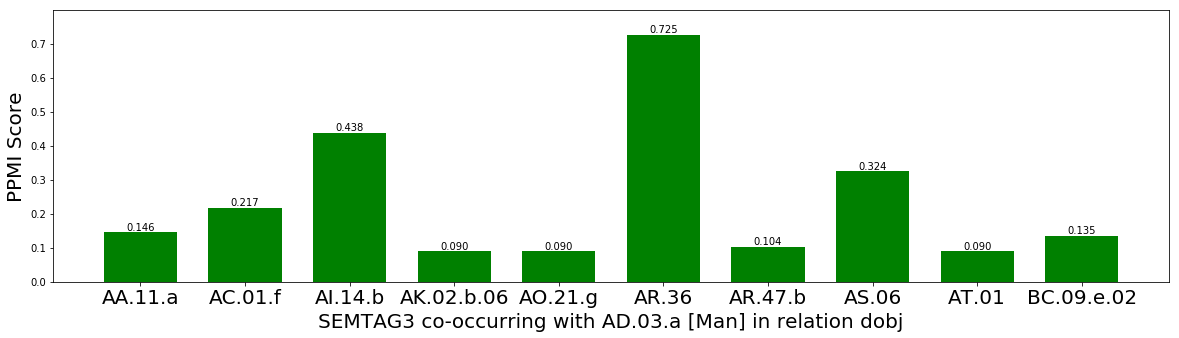

In [19]:
m=mleg.get_top_features('AD.03.a',rel='dobj',displaygraph=True)

<165569>: him when you met him Had you not said you wished the child to be taken away Was not the 
(AV.02.b [Desire],0.644781905389677) : [('wished', 1)]
<112487>: at Mr. Taylor 's did the prisoner call on you Was Thomas Child the man that took the skins to 
(AM.08.c [The past],0.48696797017041693) : [('was', 1)]
<87309>: woman . You are sure that is the woman who brought the child . I believe , if I am 
(AN.06 [Transference],0.3587365582730772) : [('brought', 1)]
<111196>: put the watch in the trunk yourself , did you Had she a child with her Did you see the 
(ZZ [Unrecognised],0.3082326728539877) : [('had', 1)]
<87323>: I believe , if I am right , you afterwards found the child in Clerkenwell workhouse . Do you know 
(AO.11.b.01 [Finding/discovery],0.2811012479788373) : [('found', 1)]
<23528>: not given that woman leave to use your name ? Have you any children ? Was there a house-keeper lived 
(AR.01 [Mental capacity],0.21071611243228514) : [('have', 1)]


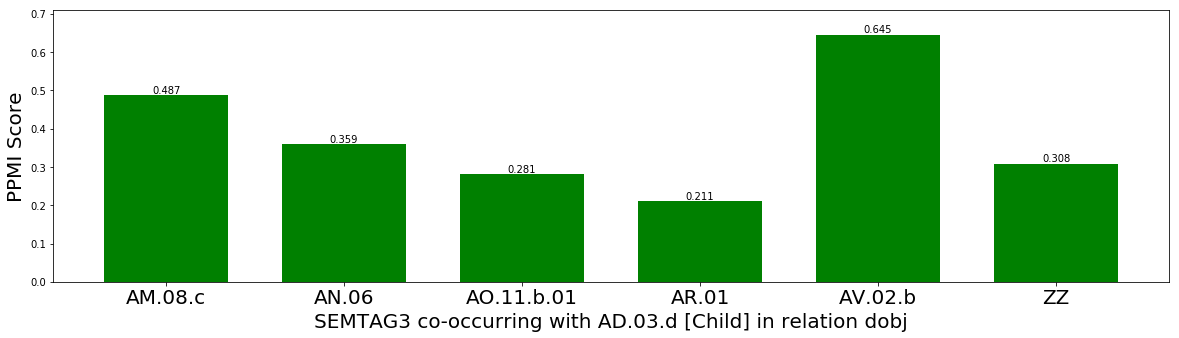

In [20]:
c=mleg.get_top_features('AD.03.d',rel='dobj',displaygraph=True)

<13966>: longer a constable ? To women of the town ? Was any other woman with you that night ? You 
<87678>: know whose property the caddy and the desk were . Was the woman at the bar the person whom you 
<108551>: property again Are you certain the prisoner is the woman Was there more than one person Was the watch taken 
(AM.08.c [The past],0.34531687630790736) : [('was', 4)]
<65950>: man coming with ten notes so immediately after the woman excited your attention ? Was it cut sufficiently to let 
(AU.05 [Excitement],0.29050287304421274) : [('excited', 1)]
<123440>: lodged there Do you remember the morning when the woman complained of having lost her pocket When you first came 
(AU.22.b [Complaint],0.29050287304421274) : [('complained', 1)]
<127994>: and never attempted to run away , and the woman held the child up to the man 's face , 
(AR.38 [Truth, validity, correctness],0.29050287304421274) : [('held', 1)]
<145936>: Slammer You saw the three parties ? Did the woman appear to be as 

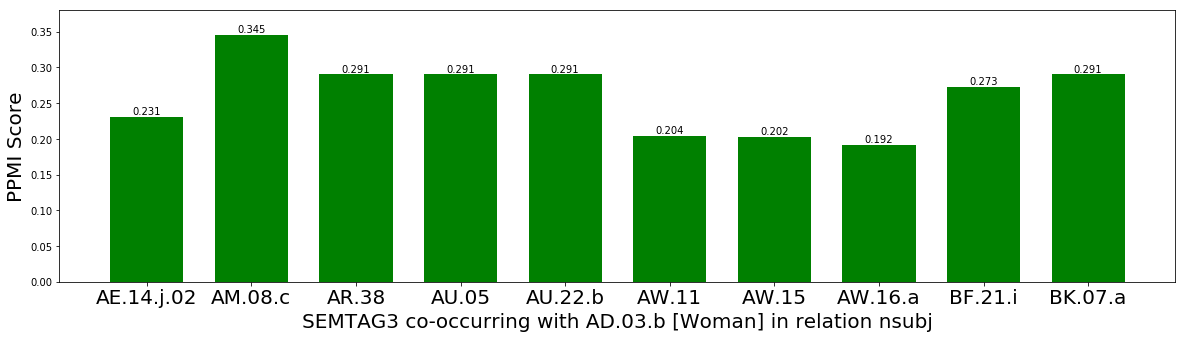

In [21]:
w=mleg.get_top_features('AD.03.b',rel='nsubj',displaygraph=True)

<17589>: the premises besides cutters ? How long did this man live with you ? Did you happen to be acquainted 
<106060>: know you had a man of the name of William live with you Did not Mr. Roufigney tell you he 
(AY.01.g.03 [Types of marriage custom/practice],0.5827192168504881) : [('lived', 7), ('live', 2)]
<13394>: not ? Does it ever happen that a man should be so wicked , in that case , as to 
(AK.01.g [State/condition],0.3147305759656046) : [('was', 38), ('is', 9), ('were', 4), ('been', 4), ('be', 1)]
<88434>: him . Was he drunk . Was the man rather drunk . Were these things your property , or were 
<134240>: . Were you dancing about there . Was this man drunk or sober . Is that your duplicate . When 
(AG.01.ak.02.a [Excess in drinking],0.20283734442879348) : [('drunk', 2)]
<34002>: To whom was the box directed ? When the man came up to you , he had not had time 
(AP.01.k [Equality/equivalence],0.19361507580507384) : [('come', 1), ('came', 1)]
<22746>: your house about this time ? 

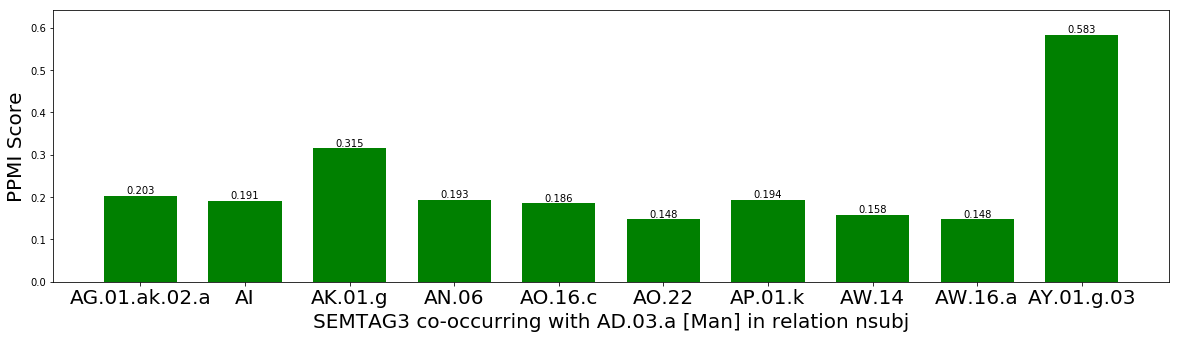

In [22]:
m=mleg.get_top_features('AD.03.a',rel='nsubj',displaygraph=True)

<126020>: things to your shop to pawn What had the child been dressed in Did the prisoner say any thing how 
(AK.01.g [State/condition],0.8543910690186797) : [('is', 3), ('been', 1)]
<134178>: . How far was it distant from where the child lost it . When you took him what did he 
(AW.07 [Loss],0.519630542964054) : [('lost', 1)]


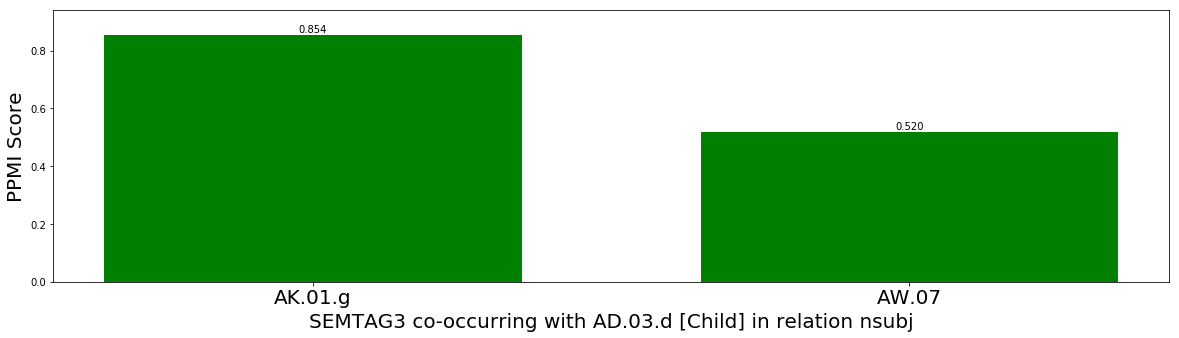

In [23]:
c=mleg.get_top_features('AD.03.d',rel='nsubj',displaygraph=True)

<86108>: . That is your conclusion ; this poor woman was taken up , the magistrate admitted her to bail . 
<86321>: these fifty-two guineas . On the day this woman was taken up did you miss any property out of this 
<133670>: yesterday , or did not you before the woman was taken up propose that if they would give you twenty 
(AA.11.a [Fine weather],0.8422112847322242) : [('taken', 3)]
<144205>: , young woman , be careful , this will be taken down . Do you mean to swear that you 
(AG.03.h [Hawking],0.3121752698817408) : [('taken', 1)]
<40926>: in conversation with you ? Had not the woman been dismissed the prisoner 's service near three months before that 
(BI.08 [Lack of work],0.3006613708818625) : [('dismissed', 1)]
<143437>: and the prisoner was secured . Let that woman be committed . Mary Black was immediately taken into the custody 
(AO.03 [Undertaking],0.2807370949107414) : [('committed', 1)]
<137145>: might have dropped from them Has the things ever been found Now , how far is Sm

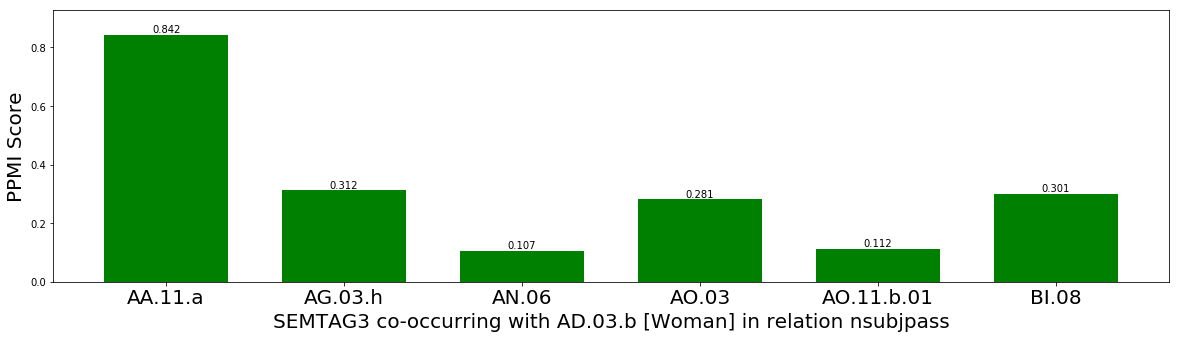

In [24]:
w=mleg.get_top_features('AD.03.b',rel='nsubjpass',displaygraph=True)

<145528>: in White-cross-street on the night that this man had been robbed Were you present when Mrs. Goodwin was in the 
<145549>: Were you present on the night that this man was robbed Did you see Goodwin there Did Mr. and Mrs. 
<145816>: gone by you , from the time the man was robbed , until the second man made his appearance How 
(AW.16.c [Robbery, piracy, raiding],0.5694292200277017) : [('robbed', 3)]
<10591>: of Mr. Tingey ? Was that before the man was taken up ? Who paid you that money ? Were 
<40032>: did you say to him first ? Three men were taken up at this time for soap-stealing ? And the 
<144985>: owner of the house in which this young man was taken up Does Hutchins occupy any part of the house 
(AA.11.a [Fine weather],0.3990979248633102) : [('taken', 3)]
<15547>: Yours is an office different from where this man was employed ? A great many clerks are employed , I 
<85793>: for some years . The man at the bar was employed for the purpose of receiving orders and taking money

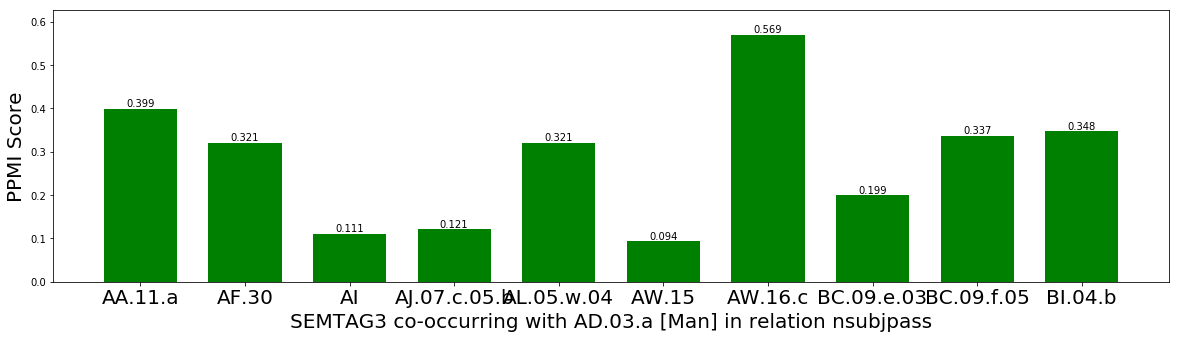

In [25]:
m=mleg.get_top_features('AD.03.a',rel='nsubjpass',displaygraph=True)

In [26]:
try:
    c=mleg.get_top_features('AD.03.d',rel='nsubjpass',displaygraph=True)
except:
    print("No nsubjpass relations found for AD.03.d")

No nsubjpass relations found for AD.03.d


<8075>: up stairs , was it a man 's footstep or a woman 's ? How old are you ? Do 
<16126>: passed away some of those notes ; do you know a woman of the name of Bridget Sturgess or Bridget 
<24444>: this manner ? According to your account , she was a very bad woman ? Upon your oath , did 
(ZC [Grammatical Item],0.9132889788387636) : [('the', 88), ('this', 43), ('a', 20), ('these', 1)]
<94825>: this man without a character . ( to Macbride ) Now young woman you got up at seven o'clock in 
(AM.08.b [The present (time)],0.3101656712058194) : [('now', 1)]
<143799>: that your brother can not either read or write Now , young woman , did not the officer ask him 
(NULL,0.26358903424843844) : [(',', 1)]
<2495>: charge her with it ? You placed great confidence in that woman ? Who was that man ? You did 
(AK.03.a [Cause/reason],0.01487677925721159) : [('that', 1)]


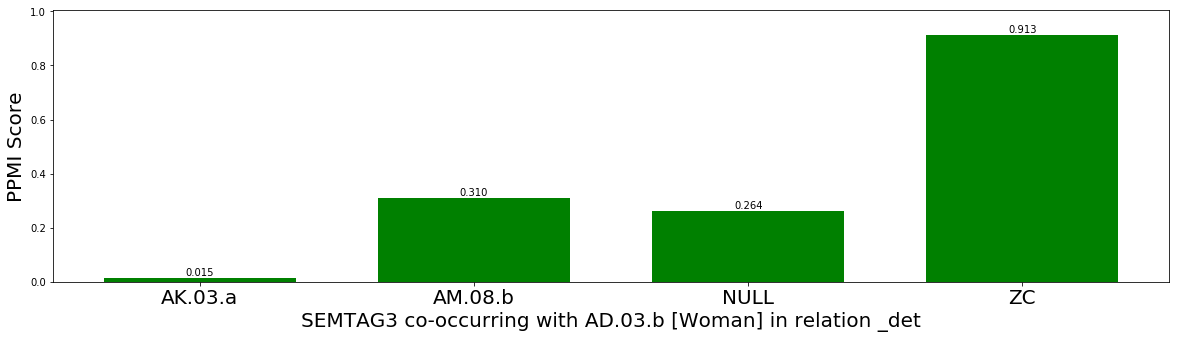

In [27]:
w=mleg.get_top_features('AD.03.b',rel='_det',displaygraph=True)

<1642>: trust to any thing he says , because he is a man of infamous character ? Were you married before 
<5021>: to show your face there ? For turning so good a man as you away ? You have never been 
<6931>: hear whether it went in a cart , or upon a man 's shoulders ? Do you know whether it 
(ZC [Grammatical Item],0.9618435524039243) : [('the', 310), ('this', 115), ('a', 102), ('an', 7), ('these', 6), ('those', 2), ('that', 1)]
<64464>: , who was the foreman ? Did you not see another man there , not so tall as him ? 
<70670>: did not see the prisoner take it , but that another man told you so ? You have always said 
<92354>: Then they did not turn you out , they chose another man ; on the night of the 10th of 
(ZZ [Unrecognised],0.26729253677806963) : [('another', 10)]
<42665>: ? Did you see the shepherd afterwards ? You see that young man , the last witness ? Did you 
(AO.21.g [Care/carefulness/attention],0.04996907265533518) : [('that', 1)]
<152783>: so many garments for every piec

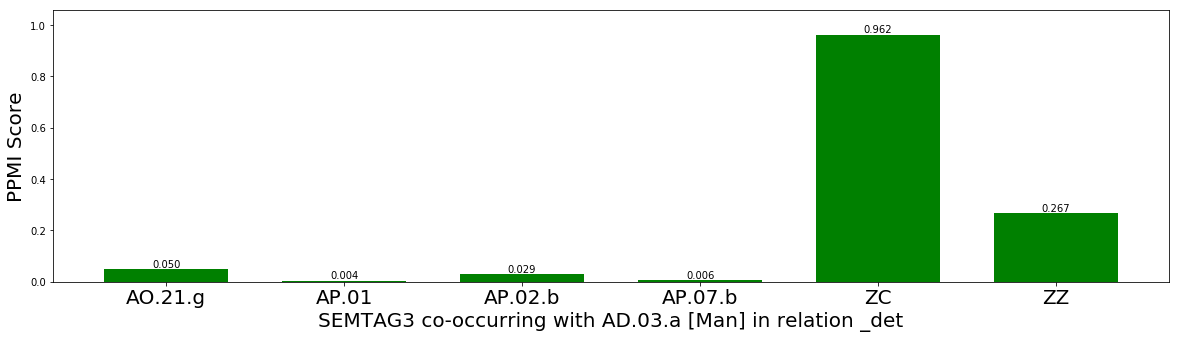

In [28]:
m=mleg.get_top_features('AD.03.a',rel='_det',displaygraph=True)

<19332>: suspicious ? Are you a married man ? Have you any children living with you at home ? A boy 
(AP.02.a [Generality],0.9492770467211822) : [('any', 1)]
<12466>: he or you made her any promise ? Had she a child with her ? Did you see the pots 
<111198>: watch in the trunk yourself , did you Had she a child with her Did you see the prisoner in 
<146069>: coffee-pot for her use in the lodging Did you lose a child 's cap at any time There was a 
(ZC [Grammatical Item],0.284374414148244) : [('the', 13), ('a', 3), ('this', 1)]
<134146>: shoes . Did he lodge there . How old is that child . You are the mother . Where did 
<142893>: . About what time of day was it you saw that little child How far is Stepney church-yard from your 
(ZF [Pronoun],0.13418003259111747) : [('that', 2)]


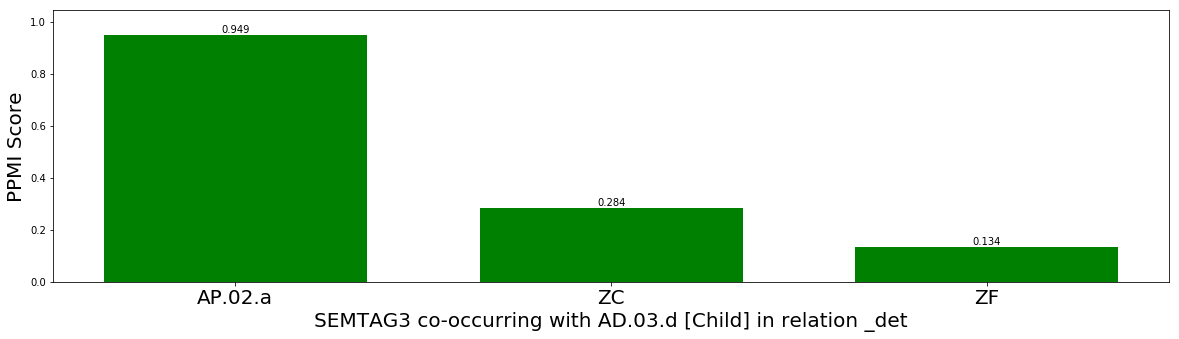

In [29]:
c=mleg.get_top_features('AD.03.d',rel='_det',displaygraph=True)

# Similar Concepts
We can find the similarity between 2 concepts in the given corpus

First, the similarities between WOMAN-MAN, WOMAN-CHILD and MAN-CHILD over the whole LPMI matrix (all grammatical relations)

We can also look at a particular relation.  We can see that MAN and WOMAN are similar in terms of their adjectival modifies and the verbs which are done to them, but disimilar in terms of the verbs they do.  On the other hand, WOMAN and CHILD and MAN and CHILD seem consistently dissimilar in all these relations.


In [30]:
rels=[None,'_amod','dobj','nsubj','_det','nsubjpass']
for rel in rels:
    print(rel)
    print("WOMAN-MAN: {}".format(mleg.find_similarity('AD.03.a','AD.03.b',rel)))
    print("MAN-CHILD: {}".format(mleg.find_similarity('AD.03.a','AD.03.d',rel)))
    print("WOMAN-CHILD: {}".format(mleg.find_similarity('AD.03.b','AD.03.d',rel)))
    print("-----")

None
WOMAN-MAN: 0.9347944124424766
MAN-CHILD: 0.6210182561200907
WOMAN-CHILD: 0.5830092674141701
-----
_amod
WOMAN-MAN: 0.9015932924902647
MAN-CHILD: 0.5112228402587189
WOMAN-CHILD: 0.5517652591914994
-----
dobj
WOMAN-MAN: 0.6121135064783157
MAN-CHILD: 0.00258601705990346
WOMAN-CHILD: 0.0
-----
nsubj
WOMAN-MAN: 0.11048609701587683
MAN-CHILD: 0.2689029932521177
WOMAN-CHILD: 0.0
-----
_det
WOMAN-MAN: 0.8784411157776288
MAN-CHILD: 0.2735236967171318
WOMAN-CHILD: 0.2597160183053214
-----
nsubjpass
WOMAN-MAN: 0.33746005219658787
Error: can't find vectors for those tags and relation
MAN-CHILD: 0
Error: can't find vectors for those tags and relation
WOMAN-CHILD: 0
-----


# Finding Nearest Neighbours


In [31]:
concepts=['AD.03.b','AD.03.a','AD.03.d']
for concept in concepts:
    for rel in rels:
        print('{} neighbours for {}'.format(concept,rel))
        print(mleg.find_knn(concept,rel))
        print("-----")

AD.03.b neighbours for None
[('AD.03.b [Woman]', 1.0), ('AD.03.a [Man]', 0.9347944124424766), ('BB.12.e.02 [Prisoner]', 0.865096175321488), ('BB.09.e.01.a [Confinement]', 0.860276380563296), ('BC.07.b [Law-enforcement/peace-officer]', 0.8452874434990217), ('BA.14.k.08.a [Officer/soldier of rank]', 0.8297236301941681), ('AD.03.d.01 [Boy]', 0.8289851321966392), ('BB.12.d.01 [Instrument/place of torture]', 0.791318871224162), ('AL.05.d.01 [An opening/aperture]', 0.7846714431445975), ('AO.16.a.02 [Refuge/shelter]', 0.7717271285260526)]
-----
AD.03.b neighbours for _amod
[('AD.03.b [Woman]', 0.9999999999999997), ('AD.03.c.01 [Youth/young man]', 0.961691046419818), ('BJ.01.y.02 [Expenditure]', 0.961691046419818), ('AY.06.b [The common people]', 0.961691046419818), ('ZA01 [Personal Name]', 0.9196843556669687), ('AD.03.a [Man]', 0.9015932924902647), ('AD.03.c.02 [Young woman]', 0.8108609187337582), ('AD.03.d [Child]', 0.5517652591914994), ('AY.06.a.02.c [Lord/lady]', 0.4921342985873679), ('AY.

## Comparing Corpora
We need a Samuels Comparator which takes a dictionary of filenames (as set up above) and allows us to compare one against the rest

In [32]:
test={'mleg':'m_leg','mnonl':'m_nonl'}

my_comp=Sam.Comparator(filenames)

Now we can compute the characteristic terms of one corpus compared to the others.  The key for the corpus which is to be compared against the others needs to be given.  

measure: default = 'llr'; others include 'pmi', 'kl' and 'jsd'

field: default = 'SEMTAG3'; any other field in the dataframe can be given e.g., 'SEMTAG1' or 'vard' but not extensively tested

cutoff: all distinctive tags will be returned for LLR, but this is used to cutoff the number for other measures and also in the list that is displayed automatically and is used in the graph

displaygraph: True to display a barchart of the terms 

Size of corpus is 165824
Size of corpus is 1468234
54 significantly characterising terms
Number of characteristic tags is 54
(AP.04.a [One], 1676.5910682759227) : [('any', 1858), ('only', 57), ('either', 20), ('alone', 4), ('sole', 2), ('single', 2), ('one', 2), ('solely', 1), ('singly', 1)]
(AM.08.c [The past], 926.5354483783249) : [('was', 635), ('yesterday', 4), ('formerly', 4), ('sometime', 2), ('going', 1), ('back', 1)]
(AS.04 [Enquiry], 780.8483284028824) : [('how', 478), ('whether', 339), ('question', 31), ('questions', 7), ('ask', 7), ('catechism', 6), ('asked', 5), ('questioned', 1), ('interview', 1)]
(AR.36 [Knowledge], 430.1907156650392) : [('know', 1001), ('known', 81), ('had', 81), ('knowledge', 47), ('knew', 47), ('have', 47), ('knowing', 18), ('acquaintance', 15), ('has', 11), ('of', 8)]
(BA.06 [Defence], 415.22360922728615) : [('were', 205), ('secured', 1), ('defend', 1)]
(AM.03 [Particular time], 385.8100533154221) : [('when', 980), ('day', 176), ('ever', 115), ('date'

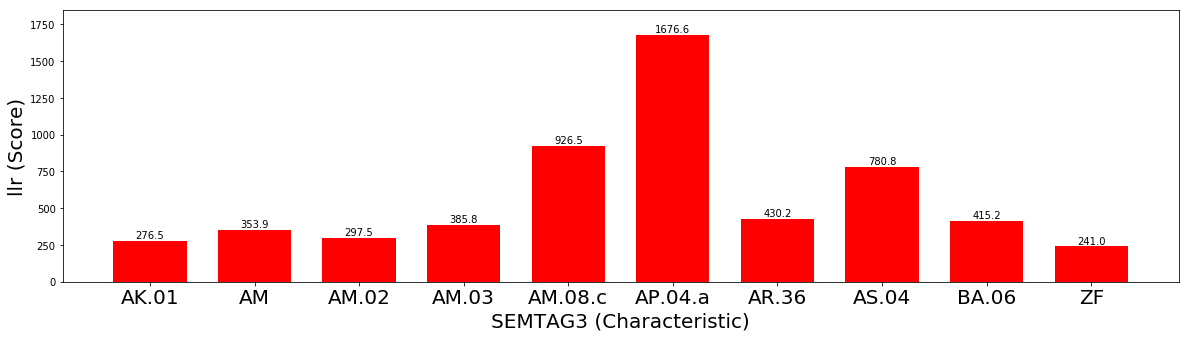

In [33]:
fdef_tags=my_comp.compute_surprises('mleg',measure='llr',field='SEMTAG3',cutoff=10,displaygraph=True)

Size of corpus is 1083003
Size of corpus is 1468234
25 significantly characterising terms
Number of characteristic tags is 25
(NULL, 532.784521069786) : [(',', 68751), ('.', 44619), (';', 29054), ('-', 1731), (':', 1378), ('(', 660), (')', 652), ('"', 484), ('?', 390), ('!', 117)]
(BC.07.b [Law-enforcement/peace-officer], 156.61163368616) : [('constable', 1131), ('watch-house', 312), ('watchman', 285), ('watchmen', 25), ('constables', 11), ('officer', 6)]
(AP.04 [Number], 104.72697579857368) : [('two', 3211), ('one', 2279), ('three', 1709), ('five', 1171), ('four', 1111), ('six', 921), ('ten', 843), ('last', 813), ('seven', 802), ('eight', 747)]
(BA.14.k.08.a [Officer/soldier of rank], 95.01414287767872) : [('officer', 1501), ('officers', 111), ('commanding', 1)]
(ZA02 [Geographical Name], 94.80079029361116) : [('st.', 628), ('holborn', 211), ('london', 175), ('smithfield', 159), ('whitechapel', 144), ('strand', 124), ('westminster', 110), ('giles', 104), ('east', 87), ('india', 80)]
(

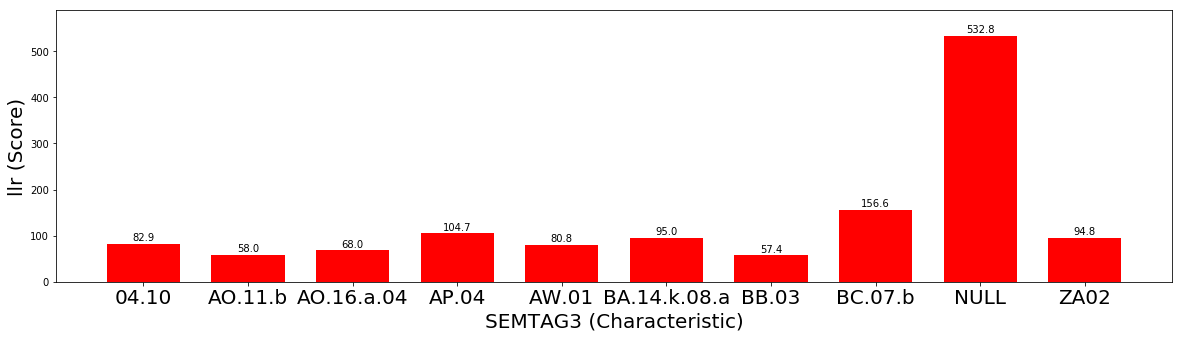

In [34]:
mwv_tags=my_comp.compute_surprises('mnonl',field='SEMTAG3',measure='llr',cutoff=10,displaygraph=True)